In [196]:
# import libs
# import sys
# !{sys.executable} -m pip install pymssql
# !{sys.executable} -m pip install pyodbc 
# !{sys.executable} -m pip install autoviz  
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install seaborn
!pip install seaborn --upgrade
!pip install missingno
!pip install fancyimpute

Requirement already up-to-date: seaborn in c:\users\yarde\anaconda3\lib\site-packages (0.11.1)
  Using cached https://files.pythonhosted.org/packages/33/ac/98a9c3f4b6e810c45196f6e15e04f9d83fe3d6000eebbb74dfd084446432/scikit_learn-0.24.2-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/ff/18/60ac053857fb924b0324c81200b59c00317ebaa3c14b7478266b50ffed19/numpy-1.19.5-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/e1/8b/d05bd3bcd0057954f08f61472db95f4ac71c3f0bf5432abe651694025396/scipy-1.6.3-cp37-cp37m-win_amd64.whl
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached https://files.pythonhosted.org/packages/f7

ERROR: astroid 2.3.1 requires typed-ast<1.5,>=1.4.0; implementation_name == "cpython" and python_version < "3.8", which is not installed.
ERROR: astroid 2.3.1 has requirement wrapt==1.11.*, but you'll have wrapt 1.12.1 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement six~=1.15.0, but you'll have six 1.12.0 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\yarde\\anaconda3\\lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [4]:

# import pymssql
# import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr
import seaborn as sn
import copy

In [5]:
## ---- part 1 ----
# driver_name = "SQL Server Native Client 11.0"
# server = "DESKTOP-UQ5HGJD\MSSQYARDEN"  # change with your server name
# dbname = "BoxOffice"

# dbstring = """'Driver={%s};'
#               'Server=%s;'
#               'Database=%s;'
#               'Trusted_Connection=yes;'""" % (driver_name, server, dbname)

In [6]:
# conn = pyodbc.connect('Driver={};'
#                       'Server={};'
#                       'Database={};'
#                       'Trusted_Connection=yes;'.format(driver_name, server, dbname))

In [7]:
# print(conn)

In [8]:
# df_movies = pd.read_sql_query('SELECT * FROM dbo.movies',conn)
# df_movies

In [121]:
# read csv 
df = pd.read_csv('data_movies.csv')  

In [122]:
# print data frame
# df

In [123]:
numerical = [
    'id', 'budget', 'popularity', 'release_date', 'year', 'month', 'runtime', 
    'revenue', 'revenue_rank', 'yearly_revenue_sum', 'revenue_year_percent', 
    'rev_budg_ratio', 'female_cnt', 'male_cnt', 'Writing', 'Art' , 'Camera',
    'Costume & Make-Up', 'Crew', 'Directing','Editing', 'Lighting',
    'Production', 'Sound', 'Visual Effects']

categorical = [
  'homepage', 'original_language', 'original_is_en', 
    'original_title','popularity_cat', 'best_seller','Action', 'Adventure',
    'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 
    'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'TV Movie', 'War', 'Western','en',
    'fr', 'es', 'de', 'ru', 'it', 'ja']

df = df[numerical + categorical]
df.shape

(7398, 58)

In [11]:
# Doesnt work check later why
# from autoviz.AutoViz_Class import AutoViz_Class
# AV = AutoViz_Class()
# df_av = AV.AutoViz('data_movies.csv')

In [12]:
# ---- Part 2 -------

In [51]:
## qustion 1
# Concentration indices , Univariate analysis
df_desc = df.describe()
# Dispersion indices
df_desc


,id,budget,popularity,year,month,runtime,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,...,TV Movie,War,Western,en,fr,es,de,ru,it,ja
count,7398.000000,7.398000e+03,7.398000e+03,7397.000000,7397.000000,7392.000000,3.000000e+03,7398.000000,7.378000e+03,3000.000000,...,7375.000000,7375.000000,7375.000000,7336.000000,7336.000000,7336.000000,7336.000000,7336.000000,7336.000000,7336.000000
mean,3699.500000,2.260146e+07,8.514968e+00,2001.218197,6.842909,107.717262,6.672585e+07,66.124899,1.749065e+10,1.195270,...,0.000136,0.032949,0.015864,0.879089,0.096919,0.076200,0.057116,0.049618,0.043757,0.027808
std,2135.762978,3.694867e+07,1.216579e+01,14.006854,3.386287,21.480040,1.375323e+08,42.637156,1.042479e+10,4.867114,...,0.011644,0.178516,0.124959,0.326046,0.295868,0.265335,0.232079,0.217170,0.204567,0.164434
min,1.000000,0.000000e+00,1.000000e-06,1950.000000,1.000000,0.000000,1.000000e+00,1.000000,2.382000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1850.250000,0.000000e+00,3.933124e+00,1993.000000,4.000000,94.000000,2.379808e+06,28.000000,7.851833e+09,0.020000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3699.500000,7.500000e+06,7.435844e+00,2005.000000,7.000000,104.000000,1.680707e+07,63.000000,2.160382e+10,0.150000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5548.750000,2.800000e+07,1.092000e+01,2011.000000,10.000000,118.000000,6.891920e+07,106.000000,2.524264e+10,0.670000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7398.000000,3.800000e+08,5.474883e+02,2049.000000,12.000000,338.000000,1.519558e+09,141.000000,3.556835e+10,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
pd.set_option("display.max_columns", None)
df.head()


,id,budget,popularity,release_date,year,month,runtime,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,female_cnt,male_cnt,Writing,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,homepage,original_language,original_is_en,original_title,popularity_cat,best_seller,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,en,fr,es,de,ru,it,ja
0,1,14000000,6.575393,2/20/15,2015.0,2.0,93.0,12314651.0,72,3.556835e+10,0.03,0.8796,0.0,13.0,2.0,12.0,8.0,13.0,4.0,4.0,2.0,4.0,9.0,10.0,4.0,0,en,1,Hot Tub Time Machine 2,High,Yes,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,40000000,8.248895,8/6/04,2004.0,8.0,113.0,95149435.0,26,1.935289e+10,0.49,2.3787,4.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0,0,en,1,The Princess Diaries 2: Royal Engagement,High,Yes,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3300000,64.299988,10/10/14,2014.0,10.0,105.0,13092000.0,58,2.853295e+10,0.05,3.9673,4.0,11.0,1.0,5.0,4.0,5.0,9.0,3.0,6.0,1.0,18.0,9.0,3.0,1,en,1,Whiplash,Superb,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1200000,3.174936,3/9/12,2012.0,3.0,122.0,16000000.0,63,3.008027e+10,0.05,13.3333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,hi,0,Kahaani,Medium,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,1.148070,2/5/09,2009.0,2.0,118.0,3923970.0,78,2.524264e+10,0.02,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,ko,0,????,Low,Yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
## qustion 1.1
# for (columnName, columnData) in df_desc.iteritems():
#     print('Colunm Name : ', columnName)
#     print('Column Contents : ', columnData.values)
for column in df_desc:
   # Select column contents by column name using [] operator
    columnSeriesObj = df_desc[column]
    print('Colunm Name : ',columnSeriesObj.name) 
    print("Range:",columnSeriesObj["max"]-columnSeriesObj["min"])
    q1 = columnSeriesObj.quantile(.25)
    q3 = columnSeriesObj.quantile(.75)
    iqr = q3 - q1
    print("IQR: ",iqr )
    print("Variance: ", columnSeriesObj.var())
    print("Std",columnSeriesObj.std())


Colunm Name :  id
Range: 7397.0
IQR:  3946.677766183151
Variance:  7107397.103699542
Std 2665.970199326981
Colunm Name :  budget
Range: 380000000.0
IQR:  30231619.815528527
Variance:  1.6986617630973846e+16
Std 130332718.95795716
Colunm Name :  popularity
Range: 547.48828025
IQR:  139.4362515006448
Variance:  6721946.465218894
Std 2592.67168481065
Colunm Name :  year
Range: 99.0
IQR:  38.25
Variance:  4516376.119002433
Std 2125.1767265341564
Colunm Name :  month
Range: 11.0
IQR:  6.653428374937297
Variance:  6827784.399901882
Std 2613.0029467840027
Colunm Name :  runtime
Range: 338.0
IQR:  97.1299900548987
Variance:  6635331.005062311
Std 2575.9136253108936
Colunm Name :  revenue
Range: 1519557909.0
IQR:  84286878.02150458
Variance:  2.7529680247683978e+17
Std 524687337.8278151
Colunm Name :  revenue_rank
Range: 140.0
IQR:  75.77213294791713
Variance:  6725423.950277475
Std 2593.342235470952
Colunm Name :  yearly_revenue_sum
Range: 35568326344.0
IQR:  16624640352.0
Variance:  1.5705674

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206D3D27A48>,
      dtype=object)

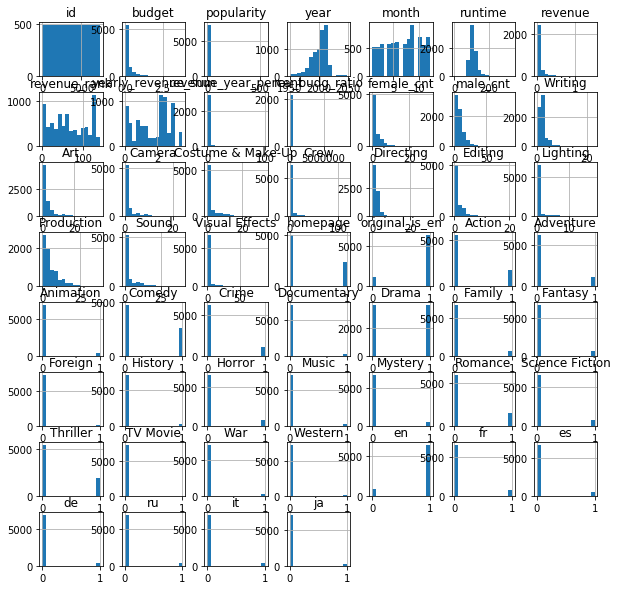

In [54]:
#qustion 2 
df.hist(bins=15, figsize=(10, 10))


In [55]:
# for column in df:
#    # Select column contents by column name using [] operator
#     columnSeriesObjColumns = df[column]
print(len(df.columns))

58


In [56]:
# df2 = copy.deepcopy(df)
# # column_1 = df2["revenue"]
# # column_2 = df2["id"]
# # correlation = column_1.corr(column_2)
# cor_mat = pd.DataFrame(np.zeros(((len(df2.columns)), len(df2.columns)),dtype = float))
# # print(cor_mat) 
# cor_mat.columns=df2.columns
# # print(cor_mat.columns)
# # cor_mat.rows = df2.columns
# # print(cor_mat)
# print(cor_mat.columns)
# cor_mat.shape
# # for i, j in enumerate(df2.columns[:-1]):
      
# # #     column_1=df2.iloc[:,i]
# # #     column_2=df2.iloc[:,i+1]
# # #     correlation = column_1.corr(column_2)
# #     cor_mat[i][i+1] = df2.iloc[:,i+1] +  df2.iloc[:,i]




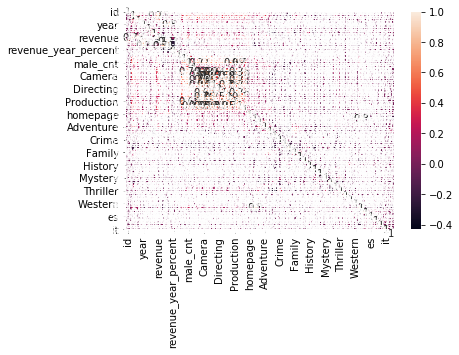

In [57]:
# qustion 3 , heatmap doesnt work check.
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot = True)

plt.show()

In [58]:
# numerical = [
#     'id', 'budget', 'popularity', 'release_date', 'year', 'month', 'runtime', 
#     'revenue', 'revenue_rank', 'yearly_revenue_sum', 'revenue_year_percent', 
#     'rev_budg_ratio', 'female_cnt', 'male_cnt', 'Writing', 'Art' , 'Camera',
#     'Costume & Make-Up', 'Crew', 'Directing','Editing', 'Lighting',
#     'Production', 'Sound', 'Visual Effects']

# categorical = [
#   'homepage', 'original_language', 'original_is_en', 
#     'original_title','popularity_cat', 'best_seller','Action', 'Adventure',
#     'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 
#     'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'TV Movie', 'War', 'Western','en',
#     'fr', 'es', 'de', 'ru', 'it', 'ja']

# df_c = df[numerical + categorical]
# df_c.shape
# cols = df.columns
# num_cols = df._get_numeric_data().columns 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206D2314308>,
      dtype=object)

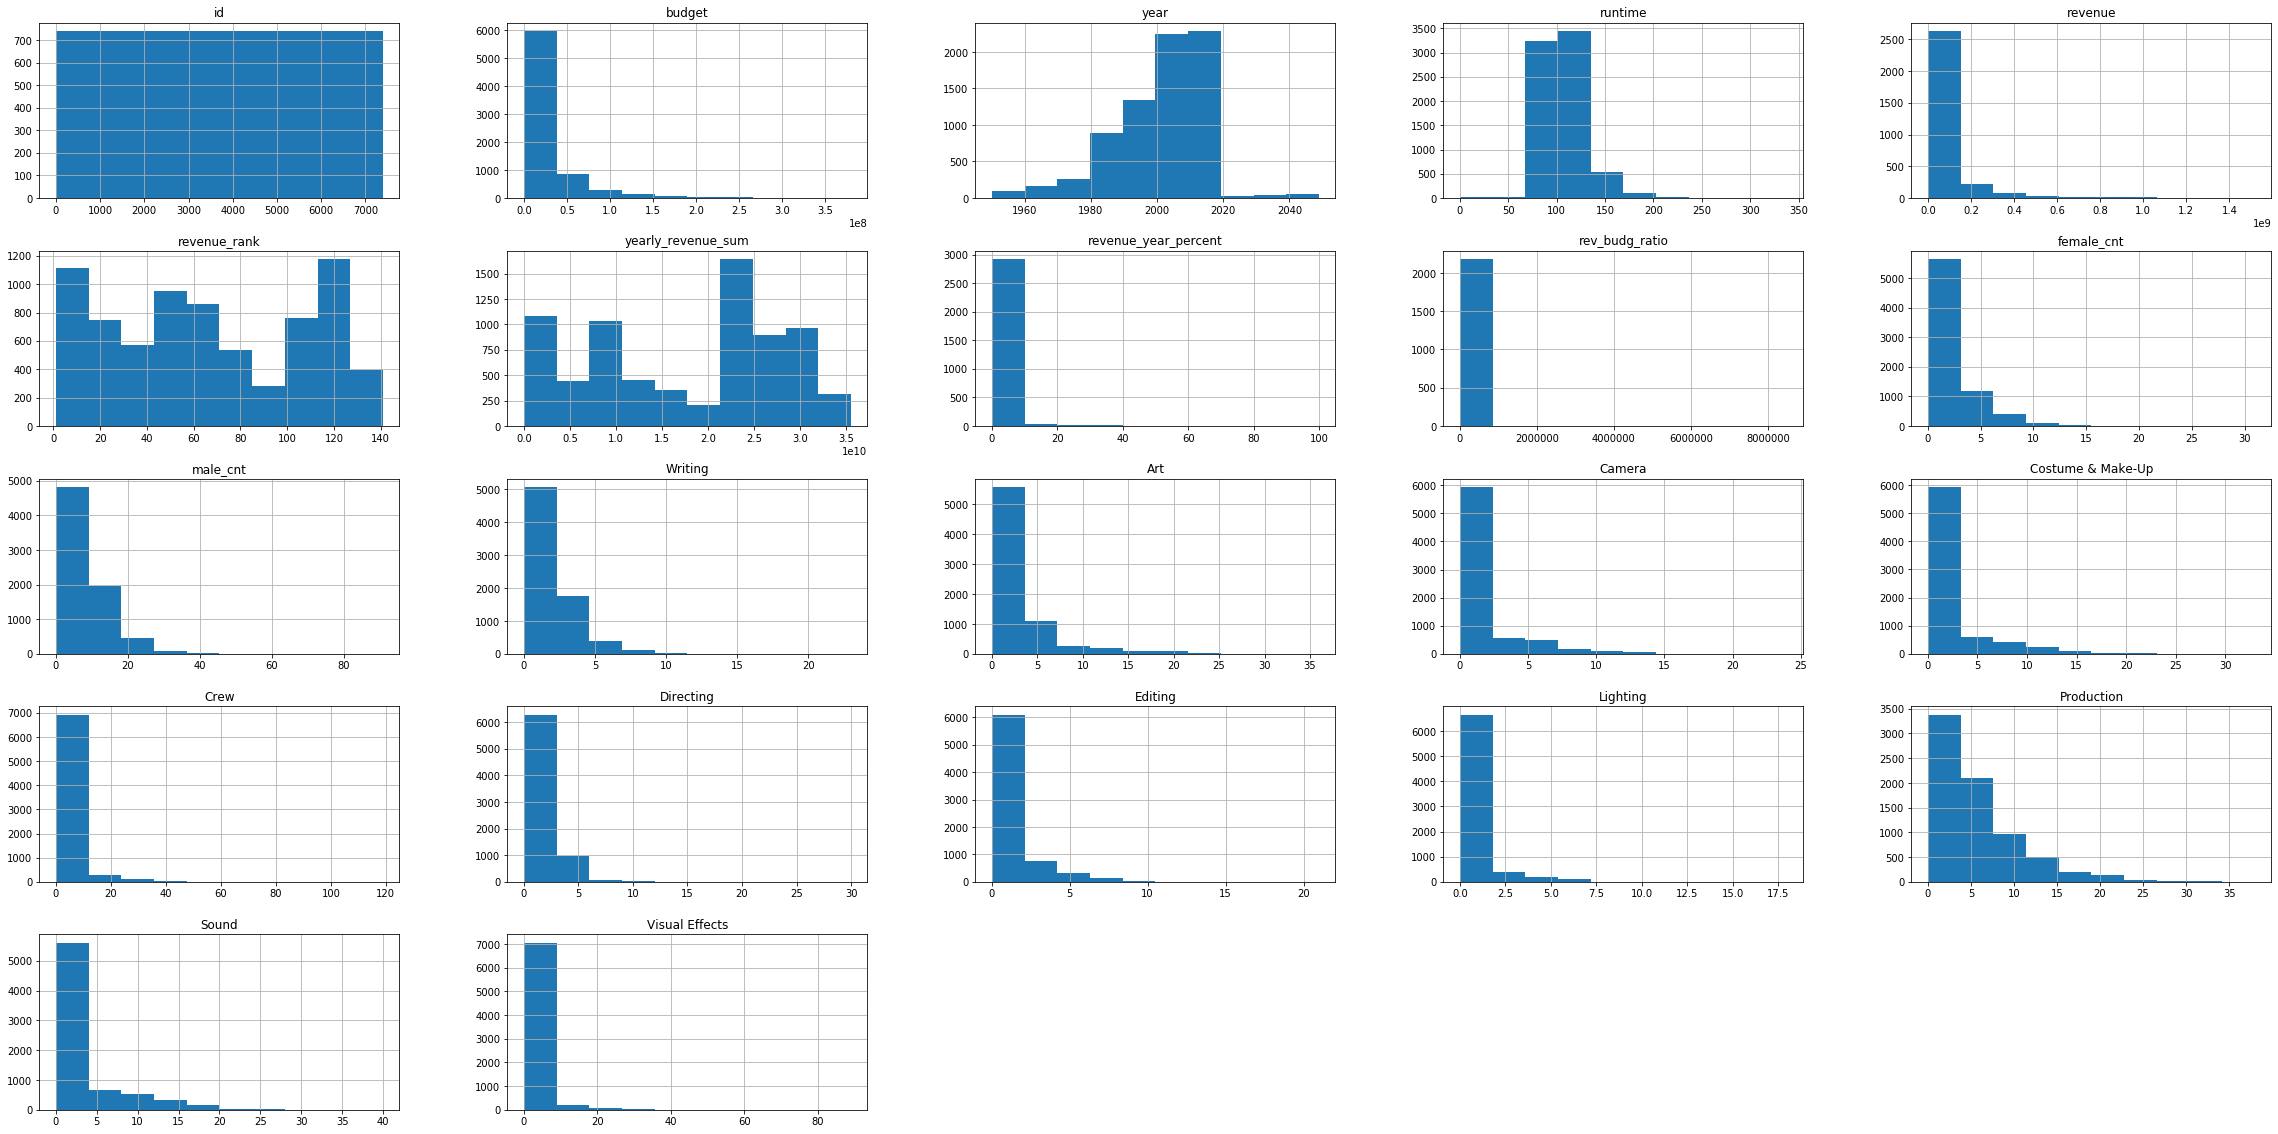

In [59]:
df[numerical].hist(figsize=(40, 20))

In [60]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 58)


C:\Users\yarde\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\yarde\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\yarde\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\yarde\Anaconda3\lib\site-

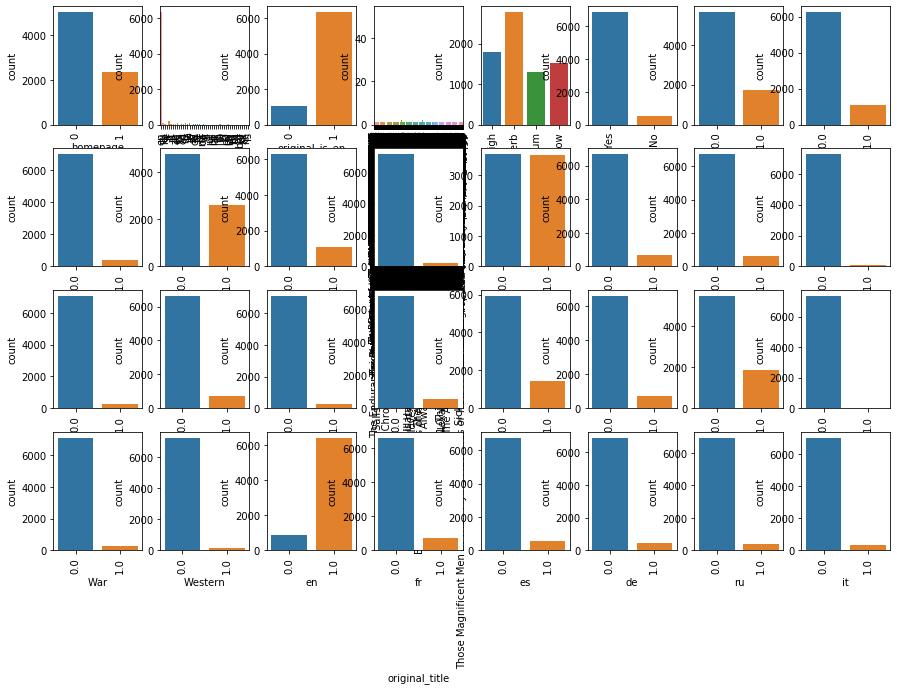

In [62]:
fig, ax = plt.subplots(4, 8, figsize=(15,10))
for variable, subplot in zip(categorical, ax.flatten()):
    sn.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

C:\Users\yarde\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yarde\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\yarde\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\yarde\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Suppor

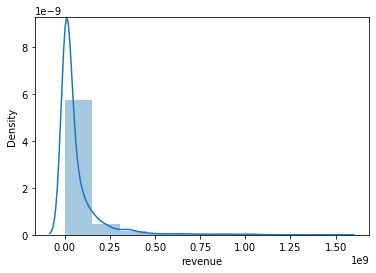

In [63]:
# qustion 4 
# exp distrubtion
sn.distplot(df['revenue'], bins=10)

In [64]:
# fig, ax = plt.subplots(4, 9, figsize=(10, 10))
# for var, subplot in zip(categorical, ax.flatten()):
#     sn.boxplot(x=var, y='revenue', data=df, ax=subplot)
# fig.tight_layout()

C:\Users\yarde\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


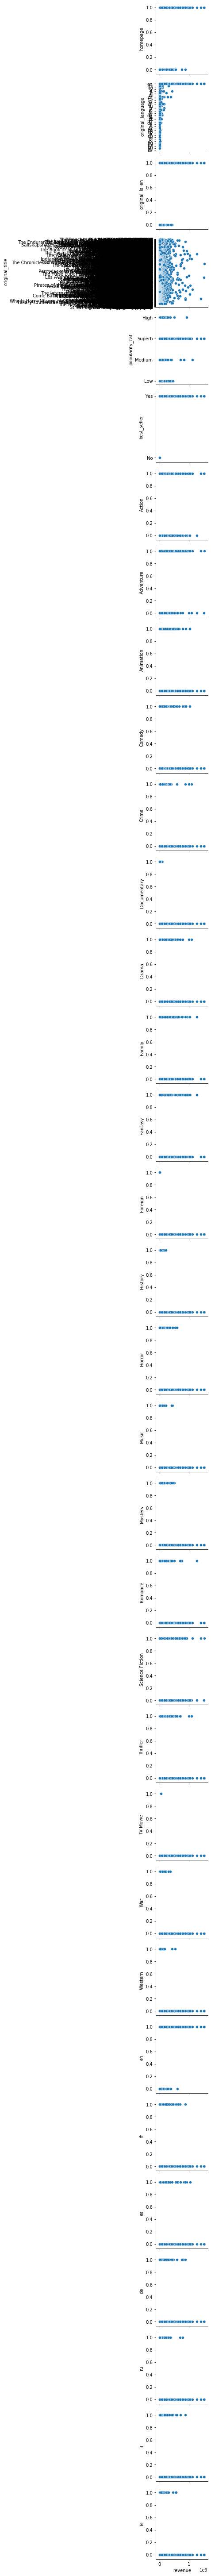

In [65]:
# qustion 4
sn.pairplot(data=df,
                  x_vars=['revenue'],
                  y_vars=categorical)


In [66]:

# for column in df:
#     plt.figure()
#     plt.plot(df[column])
#     # Show/save figure as desired.
#     plt.show()
# # Can show all four figures at once by calling plt.show() here, outside the loop.
# plt.show()


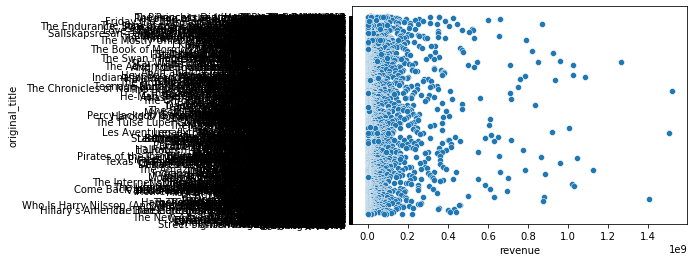

In [67]:
### qustion 5 
scatter_plot = sn.scatterplot(data=df, x='revenue', y="original_title")
scatter_plot

In [68]:
# select all numerical variables 
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.head()

,id,budget,popularity,year,month,runtime,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,female_cnt,male_cnt,Writing,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,homepage,original_is_en,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,en,fr,es,de,ru,it,ja
0,1,14000000,6.575393,2015.0,2.0,93.0,12314651.0,72,3.556835e+10,0.03,0.8796,0.0,13.0,2.0,12.0,8.0,13.0,4.0,4.0,2.0,4.0,9.0,10.0,4.0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,40000000,8.248895,2004.0,8.0,113.0,95149435.0,26,1.935289e+10,0.49,2.3787,4.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3300000,64.299988,2014.0,10.0,105.0,13092000.0,58,2.853295e+10,0.05,3.9673,4.0,11.0,1.0,5.0,4.0,5.0,9.0,3.0,6.0,1.0,18.0,9.0,3.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1200000,3.174936,2012.0,3.0,122.0,16000000.0,63,3.008027e+10,0.05,13.3333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,1.148070,2009.0,2.0,118.0,3923970.0,78,2.524264e+10,0.02,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# correlation with the variable of interest
df_corr = df_num.corr()['revenue'][:-1]

In [70]:
df_corr

id                      0.000610
budget                  0.752965
popularity              0.461460
year                    0.096776
month                   0.020164
runtime                 0.216380
revenue                 1.000000
revenue_rank           -0.429737
yearly_revenue_sum      0.134839
revenue_year_percent    0.112795
rev_budg_ratio         -0.013482
female_cnt              0.279949
male_cnt                0.403462
Writing                 0.259342
Art                     0.368459
Camera                  0.305139
Costume & Make-Up       0.314475
Crew                    0.276498
Directing               0.198724
Editing                 0.319733
Lighting                0.259666
Production              0.297867
Sound                   0.306067
Visual Effects          0.350841
homepage                0.263179
original_is_en          0.142130
Action                  0.184065
Adventure               0.328130
Animation               0.130622
Comedy                 -0.031550
Crime     

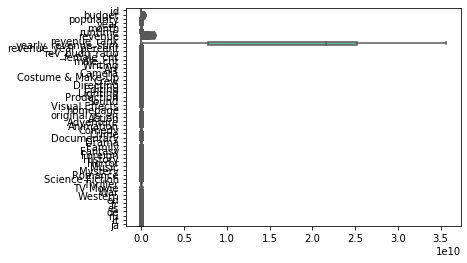

In [71]:
ax = sn.boxplot(data=df, orient="h", palette="Set2")


In [72]:
# qustion 6
print(df.isnull().sum())

id                         0
budget                     0
popularity                 0
release_date               1
year                       1
month                      1
runtime                    6
revenue                 4398
revenue_rank               0
yearly_revenue_sum        20
revenue_year_percent    4398
rev_budg_ratio          5210
female_cnt                38
male_cnt                  38
Writing                   38
Art                       38
Camera                    38
Costume & Make-Up         38
Crew                      38
Directing                 38
Editing                   38
Lighting                  38
Production                38
Sound                     38
Visual Effects            38
homepage                   0
original_language          0
original_is_en             0
original_title             0
popularity_cat             0
best_seller                0
Action                    23
Adventure                 23
Animation                 23
Comedy        

In [73]:
# qustion 7 , miising 
df.isnull()

,id,budget,popularity,release_date,year,month,runtime,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,female_cnt,male_cnt,Writing,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,homepage,original_language,original_is_en,original_title,popularity_cat,best_seller,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,en,fr,es,de,ru,it,ja
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7394,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7395,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7396,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [74]:
# qustion 7 , miising 
copy_df = copy.deepcopy(df)


In [86]:
# qustion 7 , miising 
for column_copy in copy_df:
#     print(s.isin([1]).any())
    copy_df[column_copy] = np.where(copy_df[column_copy].notna(),0 , 1)





In [76]:
# qustion 7 , miising
for column_copy in copy_df:
    print(copy_df[column_copy].isin([1]).any())

False
False
False
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


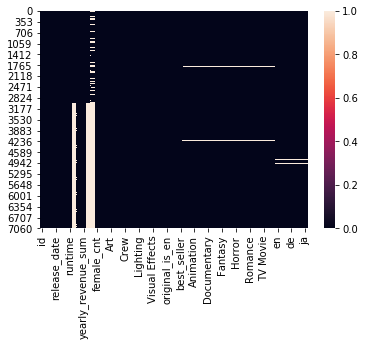

In [77]:
heat_map_missing = sn.heatmap(copy_df)

In [78]:
## checking
copy_df.loc[copy_df['runtime'].isin([1])]

,id,budget,popularity,release_date,year,month,runtime,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,female_cnt,male_cnt,Writing,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,homepage,original_language,original_is_en,original_title,popularity_cat,best_seller,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,en,fr,es,de,ru,it,ja
1335,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
2302,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3243,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4489,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4632,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6817,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0


In [79]:
## 3. cleaning eda

In [201]:
numerical = [
    'id', 'budget', 'runtime', 'year',
    'revenue', 'revenue_rank', 'yearly_revenue_sum', 'revenue_year_percent', 
    'rev_budg_ratio', 'female_cnt', 'male_cnt', 'Writing', 'Art' , 'Camera',
    'Costume & Make-Up', 'Crew', 'Directing','Editing', 'Lighting',
    'Production', 'Sound', 'Visual Effects']

categorical1 = [
  'homepage', 'original_language', 'original_is_en', 
    'original_title','popularity_cat', 'best_seller','Action', 'Adventure',
    'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 
    'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'TV Movie', 'War', 'Western','en',
    'fr', 'es', 'de', 'ru', 'it', 'ja']

In [202]:

df_outliers = copy.deepcopy(df)
df_desc_out = df_outliers.describe()
df_outliers_num= copy.deepcopy(df_outliers[numerical])
print(df_outliers_num.shape)


## check precrntage of outliers and iqr

for col in df_outliers_num.columns:
    percentile25 = df_outliers_num[col].quantile(0.25)
    percentile75 = df_outliers_num[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("--------",iqr,"----------")
    answer = (df_outliers_num[col] > upper_limit) | (df_outliers_num[col] < lower_limit)
#     print(answer.name)
    count = np.sum(answer)
    print(f'Print count of True elements in array:{answer.name} ', count)
    #new_df = df_outliers_num[df_outliers_num[col] < upper_limit]
    print(new_df)





(7398, 22)
-------- 3698.5 ----------
Print count of True elements in array:id  0
        id    budget  popularity release_date    year  month  runtime  \
0        1  14000000    6.575393      2/20/15  2015.0    2.0     93.0   
1        2  40000000    8.248895       8/6/04  2004.0    8.0    113.0   
3        4   1200000    3.174936       3/9/12  2012.0    3.0    122.0   
4        5         0    1.148070       2/5/09  2009.0    2.0    118.0   
5        6   8000000    0.743274       8/6/87  1987.0    8.0     83.0   
...    ...       ...         ...          ...     ...    ...      ...   
7393  7394  42000000    9.970359       8/3/01  2001.0    8.0    118.0   
7394  7395  19000000    6.046516      8/20/04  2004.0    8.0     95.0   
7395  7396  16000000    9.596883      12/8/82  1982.0   12.0    129.0   
7396  7397   2000000   20.359337       2/4/15  2015.0    2.0    100.0   
7397  7398     64000   11.305910      9/20/62  1962.0    9.0     85.0   

         revenue  revenue_rank  yearly_re

[7197 rows x 25 columns]
-------- 3.3699250000000003 ----------
Print count of True elements in array:rev_budg_ratio  184
        id    budget  popularity release_date    year  month  runtime  \
0        1  14000000    6.575393      2/20/15  2015.0    2.0     93.0   
1        2  40000000    8.248895       8/6/04  2004.0    8.0    113.0   
3        4   1200000    3.174936       3/9/12  2012.0    3.0    122.0   
4        5         0    1.148070       2/5/09  2009.0    2.0    118.0   
5        6   8000000    0.743274       8/6/87  1987.0    8.0     83.0   
...    ...       ...         ...          ...     ...    ...      ...   
7393  7394  42000000    9.970359       8/3/01  2001.0    8.0    118.0   
7394  7395  19000000    6.046516      8/20/04  2004.0    8.0     95.0   
7395  7396  16000000    9.596883      12/8/82  1982.0   12.0    129.0   
7396  7397   2000000   20.359337       2/4/15  2015.0    2.0    100.0   
7397  7398     64000   11.305910      9/20/62  1962.0    9.0     85.0   

 

[7197 rows x 25 columns]
-------- 2.0 ----------
Print count of True elements in array:Crew  906
        id    budget  popularity release_date    year  month  runtime  \
0        1  14000000    6.575393      2/20/15  2015.0    2.0     93.0   
1        2  40000000    8.248895       8/6/04  2004.0    8.0    113.0   
3        4   1200000    3.174936       3/9/12  2012.0    3.0    122.0   
4        5         0    1.148070       2/5/09  2009.0    2.0    118.0   
5        6   8000000    0.743274       8/6/87  1987.0    8.0     83.0   
...    ...       ...         ...          ...     ...    ...      ...   
7393  7394  42000000    9.970359       8/3/01  2001.0    8.0    118.0   
7394  7395  19000000    6.046516      8/20/04  2004.0    8.0     95.0   
7395  7396  16000000    9.596883      12/8/82  1982.0   12.0    129.0   
7396  7397   2000000   20.359337       2/4/15  2015.0    2.0    100.0   
7397  7398     64000   11.305910      9/20/62  1962.0    9.0     85.0   

         revenue  revenue_

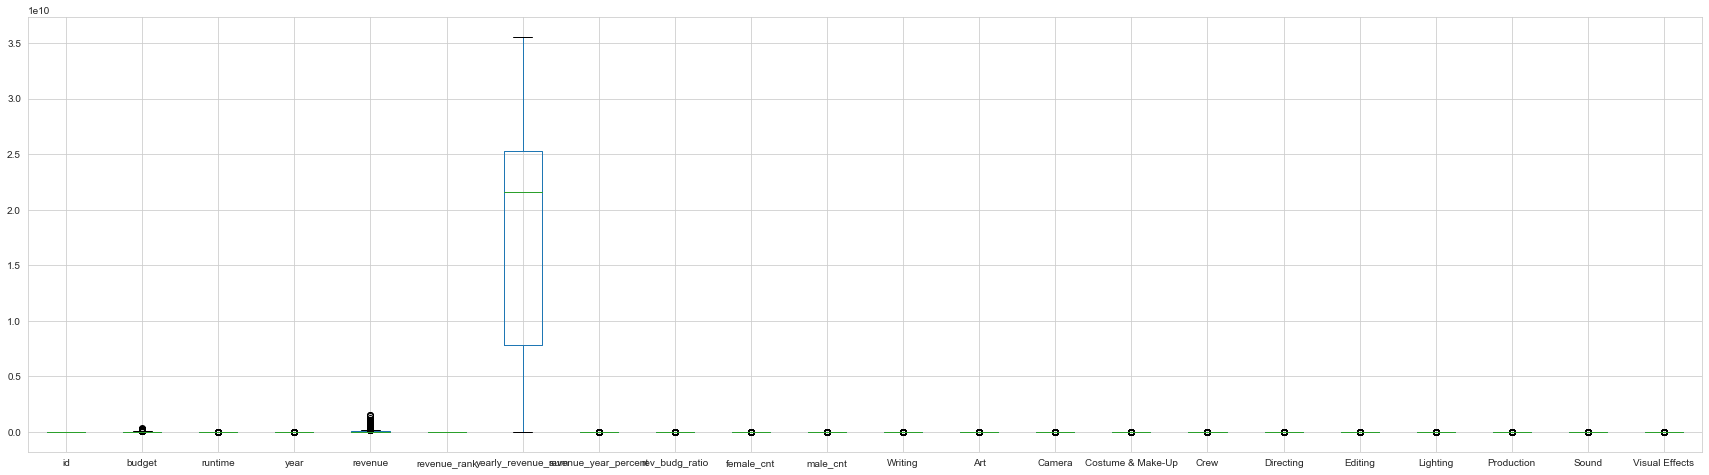

In [203]:

boxplot = df.boxplot(column=numerical,figsize=(30,8))

In [204]:
df_witout_outliers = pd.DataFrame()  


for col in df_outliers_num:
    columnSeriesObj_out = df_outliers_num[col]
#     print(columnSeriesObj_out)
    percentile25 = columnSeriesObj_out.quantile(0.25)
    percentile75 = columnSeriesObj_out.quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df_outliers_num[df_outliers_num[col] > upper_limit]
    df_outliers_num[df_outliers_num[col] < lower_limit]
    df_witout_outliers = df_outliers_num[~((df_outliers_num[col] < (q1 - 1.5 * iqr)) |(df_outliers_num[col] > (q3 + 1.5 * iqr)))]
#     new_df = df_outliers_num[df_outliers_num[col] < upper_limit]

df_witout_outliers


    




,id,budget,runtime,year,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,female_cnt,male_cnt,Writing,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects
1,2,40000000,113.0,2004.0,95149435.0,26,1.935289e+10,0.49,2.3787,4.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0
3,4,1200000,122.0,2012.0,16000000.0,63,3.008027e+10,0.05,13.3333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,0,118.0,2009.0,3923970.0,78,2.524264e+10,0.02,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,8,0,84.0,2004.0,2586511.0,62,1.935289e+10,0.01,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,9,0,100.0,1996.0,34327391.0,23,9.553879e+09,0.36,NaN,0.0,7.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,7391,0,85.0,1991.0,NaN,43,2.824355e+09,NaN,NaN,2.0,6.0,3.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0
7391,7392,10000000,110.0,2009.0,NaN,107,2.524264e+10,NaN,NaN,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7393,7394,42000000,118.0,2001.0,NaN,78,1.729337e+10,NaN,NaN,3.0,7.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,2.0,0.0
7395,7396,16000000,129.0,1982.0,NaN,26,2.248373e+09,NaN,NaN,1.0,9.0,3.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0


In [205]:
df_outliers_num

,id,budget,runtime,year,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,female_cnt,male_cnt,Writing,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects
0,1,14000000,93.0,2015.0,12314651.0,72,3.556835e+10,0.03,0.8796,0.0,13.0,2.0,12.0,8.0,13.0,4.0,4.0,2.0,4.0,9.0,10.0,4.0
1,2,40000000,113.0,2004.0,95149435.0,26,1.935289e+10,0.49,2.3787,4.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0
2,3,3300000,105.0,2014.0,13092000.0,58,2.853295e+10,0.05,3.9673,4.0,11.0,1.0,5.0,4.0,5.0,9.0,3.0,6.0,1.0,18.0,9.0,3.0
3,4,1200000,122.0,2012.0,16000000.0,63,3.008027e+10,0.05,13.3333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,0,118.0,2009.0,3923970.0,78,2.524264e+10,0.02,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393,7394,42000000,118.0,2001.0,NaN,78,1.729337e+10,NaN,NaN,3.0,7.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,2.0,0.0
7394,7395,19000000,95.0,2004.0,NaN,82,1.935289e+10,NaN,NaN,7.0,22.0,6.0,8.0,6.0,7.0,16.0,4.0,9.0,2.0,13.0,16.0,7.0
7395,7396,16000000,129.0,1982.0,NaN,26,2.248373e+09,NaN,NaN,1.0,9.0,3.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0
7396,7397,2000000,100.0,2015.0,NaN,129,3.556835e+10,NaN,NaN,0.0,6.0,1.0,2.0,2.0,4.0,2.0,2.0,3.0,1.0,6.0,2.0,4.0


In [206]:
df_witout_outliers

,id,budget,runtime,year,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,female_cnt,male_cnt,Writing,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects
1,2,40000000,113.0,2004.0,95149435.0,26,1.935289e+10,0.49,2.3787,4.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0
3,4,1200000,122.0,2012.0,16000000.0,63,3.008027e+10,0.05,13.3333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,0,118.0,2009.0,3923970.0,78,2.524264e+10,0.02,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,8,0,84.0,2004.0,2586511.0,62,1.935289e+10,0.01,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,9,0,100.0,1996.0,34327391.0,23,9.553879e+09,0.36,NaN,0.0,7.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,7391,0,85.0,1991.0,NaN,43,2.824355e+09,NaN,NaN,2.0,6.0,3.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0
7391,7392,10000000,110.0,2009.0,NaN,107,2.524264e+10,NaN,NaN,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7393,7394,42000000,118.0,2001.0,NaN,78,1.729337e+10,NaN,NaN,3.0,7.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,2.0,0.0
7395,7396,16000000,129.0,1982.0,NaN,26,2.248373e+09,NaN,NaN,1.0,9.0,3.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0


C:\Users\yarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206872C1C48>,
      dtype=object)

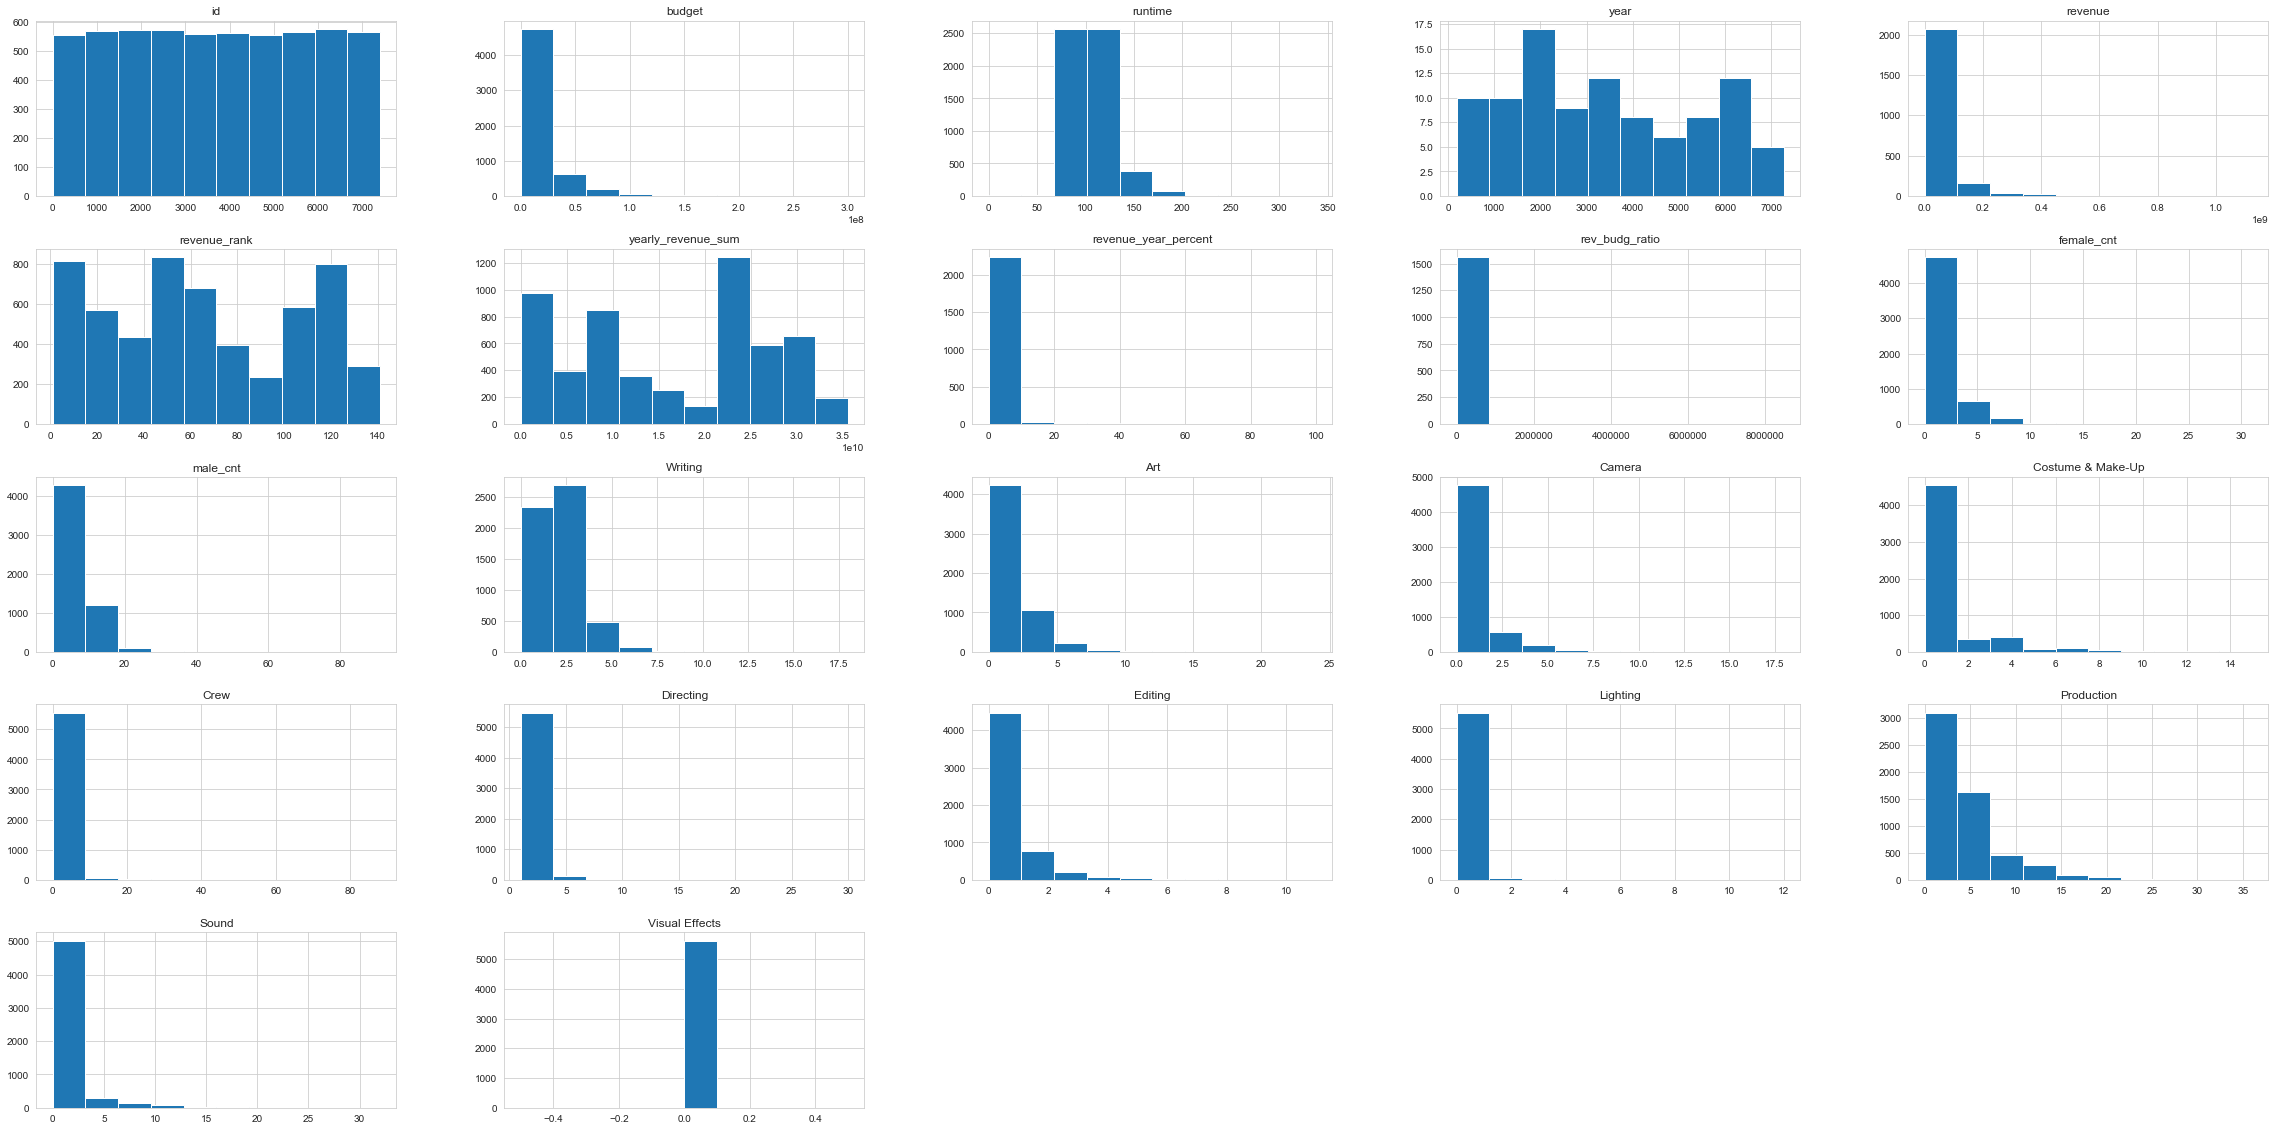

In [211]:
df_witout_outliers["year"]=df_outliers_num[df_outliers_num['year']>2021]

df_witout_outliers.hist(figsize=(40, 20))

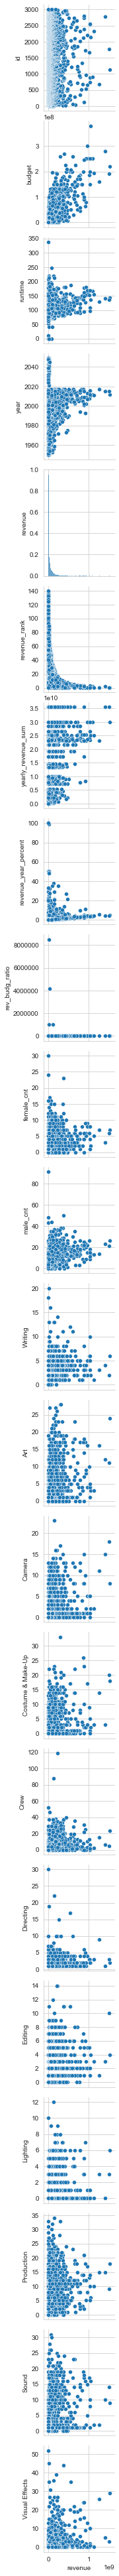

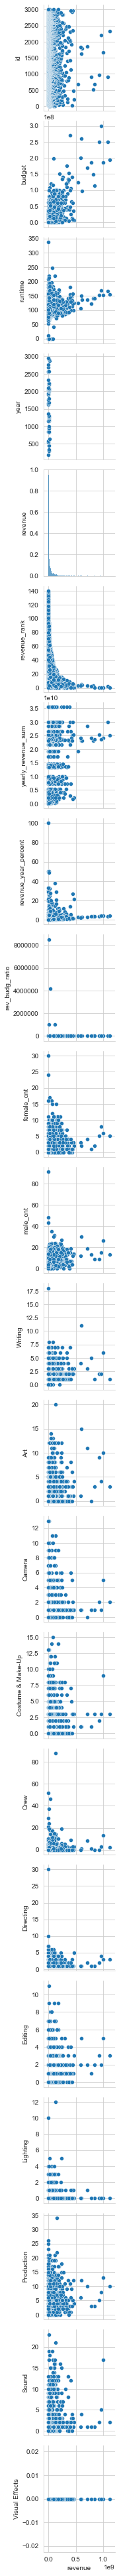

In [212]:
## qustion 3.2

sn.pairplot(data=df_outliers_num,
                  x_vars=['revenue'],
                  y_vars=df_outliers_num)


sn.pairplot(data=df_witout_outliers,
                  x_vars=['revenue'],
                  y_vars=df_witout_outliers)

In [ ]:
## qustion 3.3

In [ ]:

## in year i wiil drop the years after 2020 becuse its not correct.
## revenue year precent
## compare 2 corr matrix for signficiant assocition 
# compare distrubtion before and after

In [47]:
corrMatrix_out = df_witout_outliers.corr()

In [253]:
corrMatrix_out

,id,budget,year,runtime,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,female_cnt,male_cnt,Writing,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects
id,1.000000,0.001417,-0.017774,0.006250,0.000500,0.339132,0.001708,0.002484,-0.026919,-0.001672,0.004376,0.003294,-0.004382,0.000616,0.005451,-0.019741,0.003009,0.003926,-0.013586,0.010265,-0.004883,NaN
budget,0.001417,1.000000,0.127707,0.191798,0.724180,-0.027002,0.141282,-0.009779,-0.028620,0.237509,0.351311,0.160485,0.258158,0.115361,0.151499,0.062659,0.029489,0.215342,0.033977,0.242516,0.152277,NaN
year,-0.017774,0.127707,1.000000,-0.085036,0.027061,0.613044,0.790236,-0.047244,0.057451,0.112355,-0.138291,-0.061689,-0.034255,-0.060912,0.008965,-0.024154,-0.020236,-0.076588,-0.018659,0.150500,-0.025584,NaN
runtime,0.006250,0.191798,-0.085036,1.000000,0.189216,-0.087105,-0.041489,0.093173,-0.011213,0.061469,0.160985,0.107847,0.131536,0.118781,0.102833,0.067128,0.081078,0.139421,0.049788,0.064327,0.129149,NaN
revenue,0.000500,0.724180,0.027061,0.189216,1.000000,-0.403924,0.053106,0.106807,-0.012000,0.208940,0.320816,0.143454,0.259953,0.141922,0.178277,0.087352,0.083558,0.240184,0.062923,0.191722,0.183275,NaN
revenue_rank,0.339132,-0.027002,0.613044,-0.087105,-0.403924,1.000000,0.777009,-0.285996,-0.023085,0.029601,-0.239806,-0.128137,-0.098447,-0.133576,-0.039529,-0.077726,-0.047105,-0.129089,-0.044958,0.096581,-0.100725,NaN
yearly_revenue_sum,0.001708,0.141282,0.790236,-0.041489,0.053106,0.777009,1.000000,-0.294455,-0.028092,0.113738,-0.172521,-0.100220,-0.037614,-0.096287,0.006717,-0.049338,-0.026465,-0.083846,-0.020875,0.188386,-0.043561,NaN
revenue_year_percent,0.002484,-0.009779,-0.047244,0.093173,0.106807,-0.285996,-0.294455,1.000000,0.089037,-0.047873,0.121497,0.122193,0.069615,0.068763,0.040018,0.035293,0.094107,0.046918,-0.008226,-0.057347,0.049487,NaN
rev_budg_ratio,-0.026919,-0.028620,0.057451,-0.011213,-0.012000,-0.023085,-0.028092,0.089037,1.000000,-0.029931,0.034481,-0.015399,0.011563,0.002413,-0.022523,0.005978,0.042154,0.020218,-0.007430,-0.014863,0.002904,NaN
female_cnt,-0.001672,0.237509,0.112355,0.061469,0.208940,0.029601,0.113738,-0.047873,-0.029931,1.000000,0.513149,0.082403,0.586754,0.438431,0.509266,0.301458,0.270010,0.429793,0.291180,0.608157,0.435871,NaN


In [252]:
corrMatrix[numerical]

,id,budget,runtime,year,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,female_cnt,male_cnt,Writing,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects
id,1.000000,0.003845,0.000077,-0.008183,0.000610,0.401099,-0.000457,0.007952,-0.021908,-0.010789,-0.006387,0.000771,-0.006533,-0.006635,-0.001461,-0.011906,-0.004277,-0.002845,-0.010998,-0.002717,-0.011139,0.000391
budget,0.003845,1.000000,0.216251,0.179534,0.752965,-0.005866,0.198579,0.010810,-0.025281,0.353580,0.474404,0.289740,0.481086,0.350917,0.384624,0.356687,0.217724,0.364213,0.330690,0.348752,0.366021,0.406331
popularity,0.004816,0.340145,0.112664,0.084737,0.461460,-0.033105,0.092206,0.052895,-0.006650,0.221864,0.291452,0.160239,0.286426,0.262153,0.278062,0.261491,0.157627,0.239952,0.221234,0.240118,0.238611,0.257214
year,-0.008183,0.179534,-0.054623,1.000000,0.096776,0.566538,0.798922,-0.086931,0.047983,0.157501,-0.029606,0.002427,0.105667,0.106579,0.148760,0.075801,0.055704,0.073477,0.097043,0.204847,0.107706,0.146415
month,0.016034,0.037621,0.130205,-0.029981,0.020164,-0.010651,-0.034419,0.055577,-0.023244,0.045136,0.049159,0.011951,0.041600,0.016348,0.041555,0.008495,0.036048,0.045556,0.014919,0.033390,0.028459,0.025337
runtime,0.000077,0.216251,1.000000,-0.054623,0.216380,-0.079864,-0.017847,0.099082,-0.010807,0.125511,0.187651,0.056714,0.181629,0.163531,0.184863,0.132294,0.066478,0.166529,0.108935,0.121400,0.155113,0.037960
revenue,0.000610,0.752965,0.216380,0.096776,1.000000,-0.429737,0.134839,0.112795,-0.013482,0.279949,0.403462,0.259342,0.368459,0.305139,0.314475,0.276498,0.198724,0.319733,0.259666,0.297867,0.306067,0.350841
revenue_rank,0.401099,-0.005866,-0.079864,0.566538,-0.429737,1.000000,0.707190,-0.272885,-0.016295,0.020464,-0.182635,-0.091705,-0.028080,-0.036066,0.012264,-0.040712,-0.029840,-0.044572,-0.017018,0.077982,-0.037305,0.037596
yearly_revenue_sum,-0.000457,0.198579,-0.017847,0.798922,0.134839,0.707190,1.000000,-0.282134,-0.028273,0.164534,-0.051249,-0.019844,0.111754,0.102702,0.163485,0.070134,0.049881,0.087378,0.102167,0.240634,0.106807,0.160575
revenue_year_percent,0.007952,0.010810,0.099082,-0.086931,0.112795,-0.272885,-0.282134,1.000000,0.074841,-0.044337,0.101043,0.095332,0.027024,0.018720,0.007755,0.015389,0.068612,0.022490,-0.013917,-0.049260,0.016611,0.003105


In [176]:


percent_missing = df_outliers.isnull().sum() * 100 / len(df_outliers)
missing_value_df = pd.DataFrame({'column_name': df_outliers.columns,
                                 'percent_missing': percent_missing})
missing_value_df
# mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
# df[mask] = np.nan

,column_name,percent_missing
id,id,0.000000
budget,budget,0.000000
popularity,popularity,0.000000
release_date,release_date,0.013517
year,year,0.013517
month,month,0.013517
runtime,runtime,0.081103
revenue,revenue,59.448500
revenue_rank,revenue_rank,0.000000
yearly_revenue_sum,yearly_revenue_sum,0.270343


In [251]:
percent_missing_out = df_witout_outliers.isnull().sum() * 100 / len(df_witout_outliers)
missing_value_df_out = pd.DataFrame({'column_name': df_witout_outliers.columns,
                                 'percent_missing': percent_missing_out})
missing_value_df_out
df_out_last = df_out.copy()
print(df_out_last.columns)

,column_name,percent_missing
id,id,0.000000
budget,budget,0.000000
runtime,runtime,0.106157
year,year,98.283793
revenue,revenue,59.271054
revenue_rank,revenue_rank,0.000000
yearly_revenue_sum,yearly_revenue_sum,0.300778
revenue_year_percent,revenue_year_percent,59.271054
rev_budg_ratio,rev_budg_ratio,72.292994
female_cnt,female_cnt,0.672328


In [281]:
# 3.2
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_out =  df_out.copy()

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.columns)

id                      3.698500e+03
budget                  2.800000e+07
popularity              6.986878e+00
year                    1.800000e+01
month                   6.000000e+00
runtime                 2.400000e+01
revenue                 6.653940e+07
revenue_rank            7.800000e+01
yearly_revenue_sum      1.739080e+10
revenue_year_percent    6.500000e-01
rev_budg_ratio          3.369925e+00
female_cnt              3.000000e+00
male_cnt                8.000000e+00
Writing                 2.000000e+00
Art                     3.000000e+00
Camera                  2.000000e+00
Costume & Make-Up       2.000000e+00
Crew                    2.000000e+00
Directing               1.000000e+00
Editing                 2.000000e+00
Lighting                0.000000e+00
Production              7.000000e+00
Sound                   2.000000e+00
Visual Effects          0.000000e+00
homepage                1.000000e+00
original_is_en          0.000000e+00
Action                  0.000000e+00
A

C:\Users\yarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':
C:\Users\yarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


In [282]:
df_out

,id,budget,popularity,release_date,year,month,runtime,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,female_cnt,male_cnt,Writing,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,homepage,original_language,original_is_en,original_title,popularity_cat,best_seller,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,en,fr,es,de,ru,it,ja
11,12,0,10.543750,7/10/87,1987.0,7.0,98.0,22642033.0,19,5.268005e+09,0.43,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,en,1,Revenge of the Nerds II: Nerds in Paradise,Superb,Yes,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
43,44,6000000,9.383088,9/5/14,2014.0,9.0,92.0,1020921.0,82,2.853295e+10,0.00,0.1702,1.0,6.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,0.0,0,en,1,5 Flights Up,Superb,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
103,104,0,2.401289,9/28/12,2012.0,9.0,121.0,5310554.0,79,3.008027e+10,0.02,NaN,3.0,5.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0,en,1,Won't Back Down,Low,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
129,130,2400000,5.230661,10/16/96,1996.0,10.0,120.0,5731103.0,42,9.553879e+09,0.06,2.3880,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,en,1,Get on the Bus,Medium,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
130,131,4000000,10.130541,7/24/13,2013.0,7.0,90.0,9800000.0,76,2.999287e+10,0.03,2.4500,1.0,10.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,1,en,1,Alan Partridge: Alpha Papa,Superb,Yes,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7342,7343,3000000,5.384163,8/28/15,2015.0,8.0,120.0,NaN,129,3.556835e+10,NaN,NaN,0.0,4.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1,en,1,War Room,Medium,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7354,7355,25000000,7.456047,9/21/07,2007.0,9.0,101.0,NaN,106,2.362817e+10,NaN,NaN,7.0,10.0,2.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,14.0,1.0,0.0,1,en,1,Good Luck Chuck,High,Yes,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7383,7384,10000000,12.188120,9/11/12,2012.0,9.0,115.0,NaN,126,3.008027e+10,NaN,NaN,0.0,7.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,1.0,0.0,1,en,1,Disconnect,Superb,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7390,7391,0,6.404093,6/21/91,1991.0,6.0,85.0,NaN,43,2.824355e+09,NaN,NaN,2.0,6.0,3.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,0,en,1,Whore,High,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


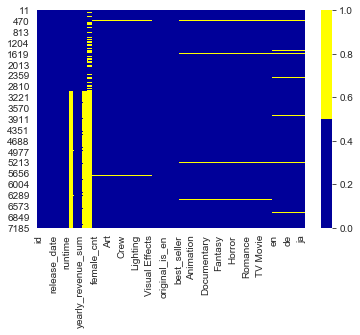

In [258]:
cols = df_out.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sn.heatmap(df_out[cols].isnull(), cmap=sn.color_palette(colours))

In [259]:

for col in df_out.columns:
    pct_missing = np.mean(df_out[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
budget - 0.0%
popularity - 0.0%
release_date - 0.0%
year - 0.0%
month - 0.0%
runtime - 0.0%
revenue - 64.0%
revenue_rank - 0.0%
yearly_revenue_sum - 0.0%
revenue_year_percent - 64.0%
rev_budg_ratio - 78.0%
female_cnt - 1.0%
male_cnt - 1.0%
Writing - 1.0%
Art - 1.0%
Camera - 1.0%
Costume & Make-Up - 1.0%
Crew - 1.0%
Directing - 1.0%
Editing - 1.0%
Lighting - 1.0%
Production - 1.0%
Sound - 1.0%
Visual Effects - 1.0%
homepage - 0.0%
original_language - 0.0%
original_is_en - 0.0%
original_title - 0.0%
popularity_cat - 0.0%
best_seller - 0.0%
Action - 1.0%
Adventure - 1.0%
Animation - 1.0%
Comedy - 1.0%
Crime - 1.0%
Documentary - 1.0%
Drama - 1.0%
Family - 1.0%
Fantasy - 1.0%
Foreign - 1.0%
History - 1.0%
Horror - 1.0%
Music - 1.0%
Mystery - 1.0%
Romance - 1.0%
Science Fiction - 1.0%
Thriller - 1.0%
TV Movie - 1.0%
War - 1.0%
Western - 1.0%
en - 2.0%
fr - 2.0%
es - 2.0%
de - 2.0%
ru - 2.0%
it - 2.0%
ja - 2.0%


created missing indicator for: release_date
created missing indicator for: year
created missing indicator for: month
created missing indicator for: revenue
created missing indicator for: yearly_revenue_sum
created missing indicator for: revenue_year_percent
created missing indicator for: rev_budg_ratio
created missing indicator for: female_cnt
created missing indicator for: male_cnt
created missing indicator for: Writing
created missing indicator for: Art
created missing indicator for: Camera
created missing indicator for: Costume & Make-Up
created missing indicator for: Crew
created missing indicator for: Directing
created missing indicator for: Editing
created missing indicator for: Lighting
created missing indicator for: Production
created missing indicator for: Sound
created missing indicator for: Visual Effects
created missing indicator for: Action
created missing indicator for: Adventure
created missing indicator for: Animation
created missing indicator for: Comedy
created missin

C:\Users\yarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\yarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


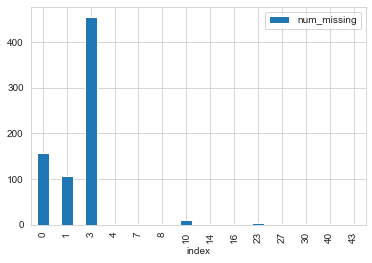

In [260]:
for col in df_out.columns:
    missing = df_out[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_out['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df_out.columns if 'ismissing' in col]
df_out['num_missing'] = df_out[ismissing_cols].sum(axis=1)

df_out['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [261]:
df_out.describe()
df_out.columns

Index(['id', 'budget', 'popularity', 'release_date', 'year', 'month',
       'runtime', 'revenue', 'revenue_rank', 'yearly_revenue_sum',
       ...
       'War_ismissing', 'Western_ismissing', 'en_ismissing', 'fr_ismissing',
       'es_ismissing', 'de_ismissing', 'ru_ismissing', 'it_ismissing',
       'ja_ismissing', 'num_missing'],
      dtype='object', length=106)

In [262]:
print(df_out.isnull().sum())

id              0
budget          0
popularity      0
release_date    1
year            1
               ..
de_ismissing    0
ru_ismissing    0
it_ismissing    0
ja_ismissing    0
num_missing     0
Length: 106, dtype: int64


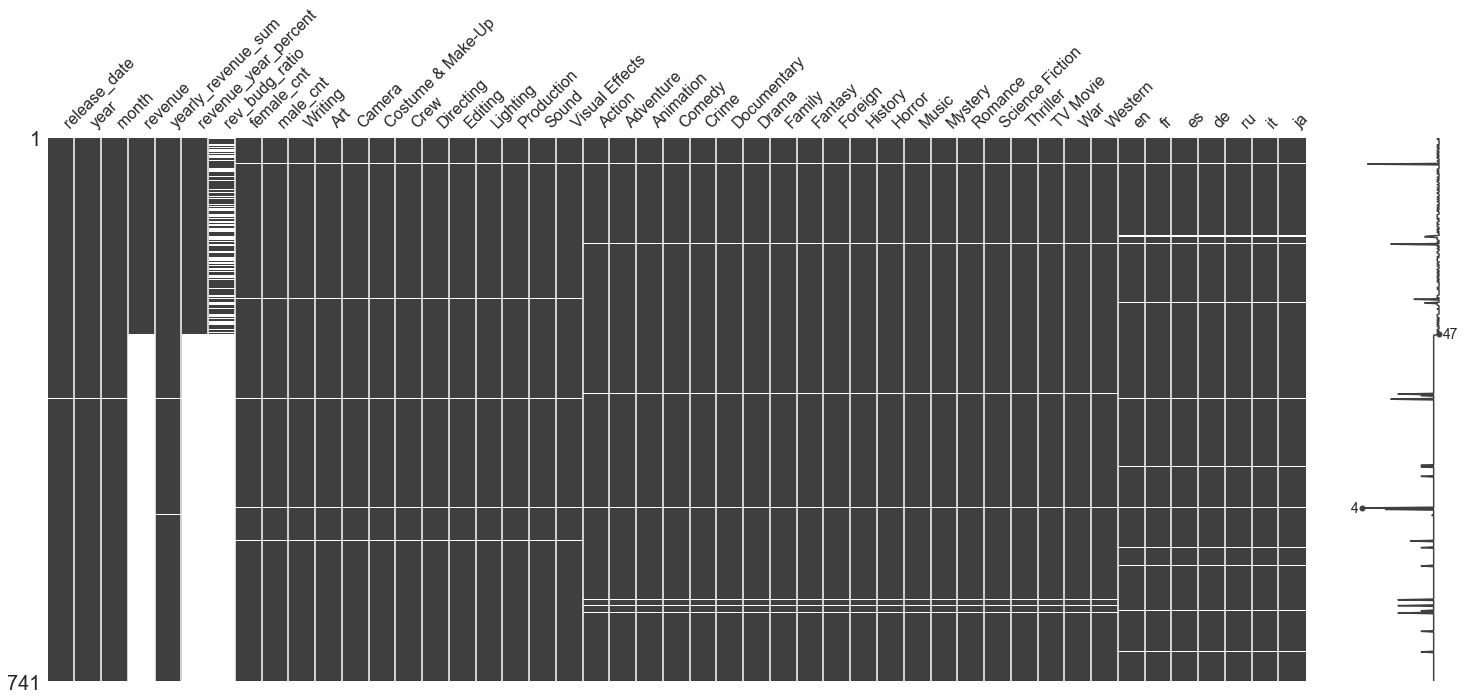

In [263]:
import  missingno as msno
missingdata_df = df_out.columns[df_out.isnull().any()].tolist()
msno.matrix(df_out[missingdata_df])

In [264]:
# import fancyimpute 
# X = df_out.copy()
# X.head()

In [265]:
# X_imputed = fancyimpute.KNN(5).fit_transform(X)
# X_imputed = pd.DataFrame(X_imputed,columns=X.columns)
# X_imputed.head()

In [269]:
df_out2 = df_out.copy()

In [296]:
#3.3 using median 
df_out2df = df_out_last.fillna(df_out_last.median())
df_out2df
# list_0 = ['release_date']
# df_out2df.drop(list_0)

,id,budget,popularity,release_date,year,month,runtime,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,female_cnt,male_cnt,Writing,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,homepage,original_language,original_is_en,original_title,popularity_cat,best_seller,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,en,fr,es,de,ru,it,ja,release_date_ismissing,year_ismissing,month_ismissing,revenue_ismissing,yearly_revenue_sum_ismissing,revenue_year_percent_ismissing,rev_budg_ratio_ismissing,female_cnt_ismissing,male_cnt_ismissing,Writing_ismissing,Art_ismissing,Camera_ismissing,Costume & Make-Up_ismissing,Crew_ismissing,Directing_ismissing,Editing_ismissing,Lighting_ismissing,Production_ismissing,Sound_ismissing,Visual Effects_ismissing,Action_ismissing,Adventure_ismissing,Animation_ismissing,Comedy_ismissing,Crime_ismissing,Documentary_ismissing,Drama_ismissing,Family_ismissing,Fantasy_ismissing,Foreign_ismissing,History_ismissing,Horror_ismissing,Music_ismissing,Mystery_ismissing,Romance_ismissing,Science Fiction_ismissing,Thriller_ismissing,TV Movie_ismissing,War_ismissing,Western_ismissing,en_ismissing,fr_ismissing,es_ismissing,de_ismissing,ru_ismissing,it_ismissing,ja_ismissing,num_missing
11,12,0,10.543750,7/10/87,1987.0,7.0,98.0,2.264203e+07,19,5.268005e+09,0.43,0.9985,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,en,1,Revenge of the Nerds II: Nerds in Paradise,Superb,Yes,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
43,44,6000000,9.383088,9/5/14,2014.0,9.0,92.0,1.020921e+06,82,2.853295e+10,0.00,0.1702,1.0,6.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,0.0,0,en,1,5 Flights Up,Superb,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
103,104,0,2.401289,9/28/12,2012.0,9.0,121.0,5.310554e+06,79,3.008027e+10,0.02,0.9985,3.0,5.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0,en,1,Won't Back Down,Low,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
129,130,2400000,5.230661,10/16/96,1996.0,10.0,120.0,5.731103e+06,42,9.553879e+09,0.06,2.3880,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,en,1,Get on the Bus,Medium,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
130,131,4000000,10.130541,7/24/13,2013.0,7.0,90.0,9.800000e+06,76,2.999287e+10,0.03,2.4500,1.0,10.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,1,en,1,Alan Partridge: Alpha Papa,Superb,Yes,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,

In [297]:
## qustion 2.1
df_out2df.describe()

,id,budget,popularity,year,month,runtime,revenue,revenue_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,female_cnt,male_cnt,Writing,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,homepage,original_is_en,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,en,fr,es,de,ru,it,ja,num_missing
count,741.000000,7.410000e+02,741.000000,741.000000,741.000000,741.000000,7.410000e+02,741.000000,7.410000e+02,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.0,741.000000,741.000000,741.0,741.000000,741.0,741.0,741.0,741.0,741.000000,741.0,741.0,741.000000,741.0,741.0,741.0,741.0,741.0,741.0,741.0,741.0,741.0,741.000000,741.0,741.0,741.0,741.0,741.0,741.0,741.0,741.0,741.0,741.0,741.000000
mean,3906.314440,9.542731e+06,6.054415,2002.105263,6.805668,103.412955,1.816233e+07,74.588394,1.818056e+10,0.083914,1.131750,1.421053,5.151147,1.721997,0.959514,0.719298,0.507422,0.164642,1.163293,0.777328,0.0,3.422402,0.815115,0.0,0.288799,1.0,0.0,0.0,0.0,0.560054,0.0,0.0,0.659919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098516,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.529015
std,2131.006445,1.388137e+07,3.833802,11.555611,3.418554,13.794321,1.690953e+07,39.223191,1.012720e+10,0.179645,0.915802,1.727610,3.571485,0.999142,1.287563,0.695171,0.864627,0.490330,0.404771,0.780037,0.0,3.601949,1.005170,0.0,0.453510,0.0,0.0,0.0,0.0,0.496716,0.0,0.0,0.474056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.298212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.472017
min,12.000000,0.000000e+00,0.000657,1967.000000,1.000000,59.000000,1.200000e+01,1.000000,9.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,2052.000000,0.000000e+00,2.863170,1994.000000,4.000000,93.000000,1.738013e+07,43.000000,8.908161e+09,0.040000,0.998500,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
50%,4025.000000,2.400000e+06,5.912650,2005.000000,7.000000,101.000000,1.816233e+07,67.000000,2.160382e+10,0.040000,0.998500,1.000000,5.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.0,3.000000,1.000000,0.0,0.000000,1.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000
75%,5789.000000,1.500000e+07,8.568378,2012.000000,10.000000,112.000000,1.816233e+07,115.000000,2.524264e+10,0.040000,0.998500,2.000000,8.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,5.000000,1.000000,0.0,1.000000,1.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000
max,7396.000000,7.000000e+07,17.502375,2035.000000,12.000000,154.000000,1.407958e+08,141.000000,3.556835e+10,1.530000,8.695700,7.000000,21.000000,6.000000,6.000000,5.000000,5.000000,4.000000,3.000000,5.000000,0.0,18.000000,6.000000,0.0,1.000000,1.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,43.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206BBA13088>,
      dtype=object)

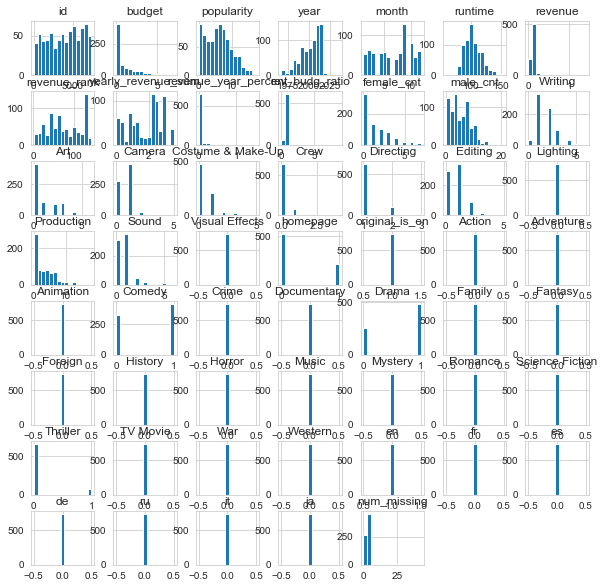

In [277]:
df_out2df.hist(bins=15, figsize=(10, 10))


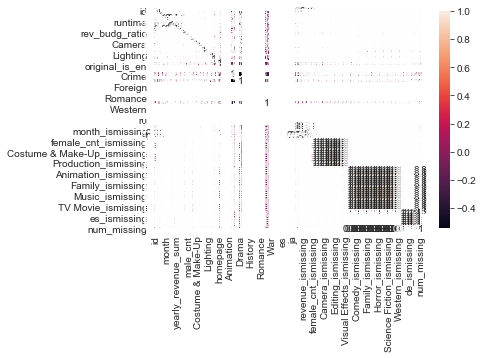

In [278]:
corrMatrix_ = df_out2df.corr()
sn.heatmap(corrMatrix_, annot = True)

plt.show()

C:\Users\yarde\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yarde\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\yarde\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\yarde\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Suppor

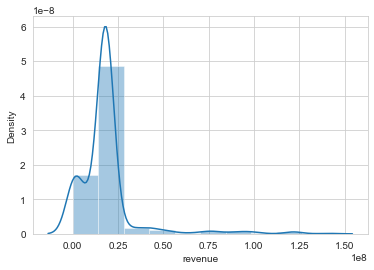

In [288]:
## 2.4
sn.distplot(df_out2df['revenue'], bins=10)


C:\Users\yarde\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


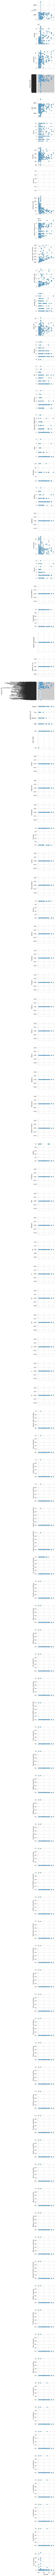

In [290]:
# 2.5
sn.pairplot(data=df_out2df,
                  x_vars=['revenue'],
                  y_vars=df_out2df.columns)

In [302]:
#2.7
for df_out2df_ in df_out2df:
    print(df_out2df[df_out2df_].isin([1]).any())
heat_map_missing_ = sn.heatmap(df_out2df)

ValueError: could not convert string to float: '7/10/87'